# CHAPTER 8 영문 텍스트 데이터 분석

## 8.2 텍스트 데이터 분석

### 8.2.2 영어 뉴스 데이터 수집 

#### O 필요한 패키지 읽어들이기
- http.client는 데이터를 요청하는 client의 http 프로토콜을 관리하는 패키지
- Urllib.request는 url을 열고 데이터를 읽어 들이는 패키지<br />
- Urllib.parse 는 url을 통해 읽어온 데이터를 문법적으로 분석<br />
- Urllib.error 는 request에서 발생하는 오류 처리<br />
- Base64는 읽어온 이진 형태의 데이터를 ASCII 형태로 변환<br />
- Json은 json 스트링이나 파일을 파싱하는 패키지<br />
- Pandas는 데이터프레임을 사용하기 위한 패키지<br />
- Numpy는 수학적 연산을 하기 위한 패키지<br />

In [1]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import json
import pandas as pd
import numpy as np

#### O 컬럼 명이 name, description, category인 데이터 프레임 구성
- Name : 뉴스 제목<br/>
- Description : 뉴스 요약 내용<br/>
- Category : 뉴스 카테고리<br/>

In [2]:
df = pd.DataFrame(columns=('name','description','category'))

#### O 발급받은 API 키 입력

##### **학생들은 아래의 키를 사용하지 말고 각자 키를 발급받아 사용하시기 바랍니다.**



In [3]:
headers = {
    'Ocp-Apim-Subscription-Key': '40d488eaf2024133902f573bee55a704',

}

#### O 데이터의 분야, 형식, 개수 지정

- 뉴스마켓과 카테고리 안내사이트 : 페이지의 가장 아래 부분에서 볼 수 있음

> https://msdn.microsoft.com/en-us/library/dn760793.aspx 


##### Sports 수집

In [4]:
params = urllib.parse.urlencode({
    # Business, Entertainment, Health, Politics, ScienceAndTechnology, Sports, UK, World
    'Category': 'Sports',   # Sports, World
    'Market': 'en-GB',
    'Count':100
})

- try 문에서 일련의 작업을 시도 <br />
-  http 프로토콜을 사용해 테이터를 요청하는 http.client의 모듈 중 HTTPSConnection을 사용해 지정된 url과 연결<br />
- 연결 요청 정보를 url 뒤 변수로 선언하고, request 함수를 사용해 데이터를 요청<br />
- “GET” : url에 요청 정보가 문자 그대로 보이는 형태로 데이터를 요청하는 방식<br />
- “/bing/v5.0/news/?%s” : url 뒤에 연결되는 문자열로, ? 뒤에 요청 정보 입력<br />
- 앞에서 설정한 params와 headers 포함시킴<br />
- bing 뉴스 수집에서 body 정보는 따로 필요하지 않음<br />
<br />
<br />
<br />
<br />
- Try 문 내에서 시도한 작업을 실패할 경우 except 문을 사용해 예외처리<br />
- 작업 실패 시 오류 메시지 출력<br />
- format 함수를 사용해 첫 번째 문자열 {0}에는 e.errno, 오류 번호가 출력<br />
- 두 번째 문자열 {1}에는 e.strerror, 오류 내용이 출력<br />

In [5]:
try:
    conn = http.client.HTTPSConnection('api.cognitive.microsoft.com')
    conn.request("GET", "/bing/v5.0/news/?%s" % params, "{body}", headers)
    
    response = conn.getresponse()  # Getresponse를 사용해 뉴스 데이터를 받아 변수 response에 저장
    data = response.read()  # Response에 저장된 데이터는 HTTPResponse 객체 형식이므로 read 함수를 사용해 읽어 변수 data에 저장
    print(data)             # Data 출력
    conn.close()            # 연결 종료
    
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

b'{"_type": "News", "value": [{"name": "Record-breaking Roger Federer even surprising himself as fairytale year continues with eighth Wimbledon title", "url": "http:\\/\\/www.bing.com\\/cr?IG=9427338365E643DF9158622700F3BF92&CID=23FE50FA653C6A5D15AA5A3864FC6BB6&rd=1&h=fWGo1plh1qziYImewe6orsd5JXDA6a7OkZK_Ya7Mo4k&v=1&r=http%3a%2f%2fwww.independent.co.uk%2fsport%2ftennis%2fwimbledon%2froger-federer-wimbledon-title-win-eight-time-champion-all-england-club-record-a7844306.html&p=DevEx,5203.1", "image": {"thumbnail": {"contentUrl": "https:\\/\\/www.bing.com\\/th?id=ON.25F9D0F238A4DADB1D206E193BEC96E5&pid=News", "width": 700, "height": 525}}, "description": "Even in his most difficult moments Roger Federer always believed that he could win Grand Slam titles again, including Wimbledon. However, as he contemplated the future during his six-month break at the end of last year the Swiss sought reassurance from his ...", "about": [{"readLink": "https:\\/\\/api.cognitive.microsoft.com\\/api\\/v5\\/

In [6]:
data = data.decode('utf-8')   # 변수 data에 저장된 뉴스 데이터를 utf-8형태로 변환
obj = json.loads(data)        # Data의 뉴스 데이터를 json 형태로 다시 변환
val = obj['value']            # Obj의 정보 중 뉴스에 대한 내용을 포함하고 있는 value 값들을 변수 val에 저장
val[0].keys()               # val의 key값들 출력

dict_keys(['url', 'about', 'image', 'category', 'provider', 'description', 'name', 'datePublished', 'clusteredArticles'])

In [7]:
val[1].keys()

dict_keys(['url', 'about', 'image', 'category', 'provider', 'description', 'name', 'datePublished', 'clusteredArticles'])

In [8]:
val[2].keys()

dict_keys(['url', 'about', 'image', 'category', 'provider', 'description', 'name', 'datePublished'])

In [9]:
val[3].keys()

dict_keys(['url', 'about', 'image', 'category', 'provider', 'description', 'name', 'datePublished'])

In [10]:
l = len(df)                                                 # df = pd.DataFrame(columns=('name','description','category'))
                                                            # data frame 내의 행의 갯수. 초기값은 0
print("l:", l)
print(len(val))
for i in range(0,len(val)) :                                # val: 가져온 뉴스의 갯수. 여기서는 100
    df.loc[l+i] = [val[i]['name'], val[i]['description'],   # name, description, category를 추출하여 dataframe에 입력
                   val[i]['category']]
df

l: 0
98


,name,description,category
0,Record-breaking Roger Federer even surprising ...,Even in his most difficult moments Roger Feder...,Sports
1,Lewis Hamilton: Silverstone has a new owner - ...,Lewis Hamilton won the British Grand Prix for ...,Sports
2,Tiemoue Bakayoko reveals the influence Chelsea...,Tiemoue Bakayoko has revealed two Chelsea lege...,Sports
3,Linfield vows to ban louts who marred Celtic g...,Thugs who hurled missiles at Celtic players du...,Sports
4,Cycling: Froome survives French coup attempt t...,"LE-PUY-EN-VELAY, France (Reuters) - Chris Froo...",Sports
5,Striker Lukaku warned of extra pressure at Man...,(Reuters) - Manchester United striker Romelu L...,Sports
6,"Transfer News LIVE updates: Man Utd, Arsenal, ...","5:35am: Arsenal reportedly hope a new £275,000...",Sports
7,"Alexis Sanchez to be offered whopping £275,000...",ARSENE WENGER hopes a whopping contract and li...,Sports
8,'Try your nuts off' Andy Murray's pep talk to ...,"The St Aloysius College pupil, who has been tr...",Sports
9,José Mourinho says signing Ronaldo is 'mission...,After this stroll of a victory José Mourinho b...,Sports


##### World 수집

In [11]:
params = urllib.parse.urlencode({
    # Business, Entertainment, Health, Politics, ScienceAndTechnology, Sports, UK, World
    'Category': 'World',   # Sports, World
    'Market': 'en-GB',
    'Count':100
})

In [12]:
try:
    conn = http.client.HTTPSConnection('api.cognitive.microsoft.com')
    conn.request("GET", "/bing/v5.0/news/?%s" % params, "{body}", headers)
    
    response = conn.getresponse()  # Getresponse를 사용해 뉴스 데이터를 받아 변수 response에 저장
    data = response.read()  # Response에 저장된 데이터는 HTTPResponse 객체 형식이므로 read 함수를 사용해 읽어 변수 data에 저장
    print(data)             # Data 출력
    conn.close()            # 연결 종료
    
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

b'{"_type": "News", "value": [{"name": "Nine killed and boy missing as flash flood rips through Arizona swimming hole", "url": "http:\\/\\/www.bing.com\\/cr?IG=52F87B1D96BA47EE9EDC5A96F9843042&CID=3FD15072111E6735015C5AB010DE66C3&rd=1&h=mG7Vo-WYJj4qb8ubcVuPUzIPu6qt8QFj0MoWvoKjg6k&v=1&r=http%3a%2f%2fwww.telegraph.co.uk%2fnews%2f2017%2f07%2f17%2fnine-killed-boy-missing-flash-flood-rips-arizona-swimming-hole%2f&p=DevEx,5006.1", "image": {"thumbnail": {"contentUrl": "https:\\/\\/www.bing.com\\/th?id=ON.6152A4D625EE385FFFFFE8B6C24507AE&pid=News", "width": 700, "height": 437}}, "description": "Nine people died and a 13-year-old boy was still missing Sunday after a furious flash flood tore through a group of family and friends cooling off in a creek in the Tonto National Forest in Arizona. Gila County Sheriff\'s Detective David Hornung told The ...", "about": [{"readLink": "https:\\/\\/api.cognitive.microsoft.com\\/api\\/v5\\/entities\\/bf973f46-5962-4997-a7ba-a05f1aa2a9f9", "name": "Arizona"

In [13]:
data = data.decode('utf-8')   # 변수 data에 저장된 뉴스 데이터를 utf-8형태로 변환
obj = json.loads(data)        # Data의 뉴스 데이터를 json 형태로 다시 변환
val = obj['value']            # Obj의 정보 중 뉴스에 대한 내용을 포함하고 있는 value 값들을 변수 val에 저장
val[0].keys()               # val의 key값들 출력

dict_keys(['url', 'about', 'image', 'category', 'provider', 'description', 'name', 'datePublished'])

In [14]:
l = len(df)                                                 # df = pd.DataFrame(columns=('name','description','category'))
                                                            # data frame 내의 행의 갯수. 초기값은 0
print("l:", l)
print(len(val))
for i in range(0,len(val)) :                                # val: 가져온 뉴스의 갯수. 여기서는 100
    df.loc[l+i] = [val[i]['name'], val[i]['description'],   # name, description, category를 추출하여 dataframe에 입력
                   val[i]['category']]
df

l: 98
100


,name,description,category
0,Record-breaking Roger Federer even surprising ...,Even in his most difficult moments Roger Feder...,Sports
1,Lewis Hamilton: Silverstone has a new owner - ...,Lewis Hamilton won the British Grand Prix for ...,Sports
2,Tiemoue Bakayoko reveals the influence Chelsea...,Tiemoue Bakayoko has revealed two Chelsea lege...,Sports
3,Linfield vows to ban louts who marred Celtic g...,Thugs who hurled missiles at Celtic players du...,Sports
4,Cycling: Froome survives French coup attempt t...,"LE-PUY-EN-VELAY, France (Reuters) - Chris Froo...",Sports
5,Striker Lukaku warned of extra pressure at Man...,(Reuters) - Manchester United striker Romelu L...,Sports
6,"Transfer News LIVE updates: Man Utd, Arsenal, ...","5:35am: Arsenal reportedly hope a new £275,000...",Sports
7,"Alexis Sanchez to be offered whopping £275,000...",ARSENE WENGER hopes a whopping contract and li...,Sports
8,'Try your nuts off' Andy Murray's pep talk to ...,"The St Aloysius College pupil, who has been tr...",Sports
9,José Mourinho says signing Ronaldo is 'mission...,After this stroll of a victory José Mourinho b...,Sports


- 위와 같이 category 변경하면서 반복하여 data frame에 해당 데이터를 쌓는다.
- 이렇게 되면 여러 category의 뉴스를 저장하게 된다.
- 이후 다음 코드에서 뉴스의 순서를 임의로 섞어 분류 실험을 할 준비를 한다.
- np.random.permutation 함수를 사용해 0부터 (df의 길이 -1)까지의 숫자를 random으로 반환하고
- iloc 함수를 사용해 랜덤으로 주어진 인덱스에 해당하는 데이터프레임 df의 데이터를 새로운 데이터 프레임 df_sh에 저장
- 랜덤으로 섞인 뉴스 데이터가 저장된 df_sh를 csv 파일로 저장

In [11]:
df_sh = df.iloc[np.random.permutation(len(df))]
df_sh.to_csv('bing_news_shuffle.csv')

### 8.2.3 텍스트 데이터 처리

In [15]:
import nltk # 영문 자연어 처리 패키지 NLTK(Natural Language ToolKit)를 불러들임

In [16]:
df = pd.read_csv('bing_news_shuffle.csv', encoding = 'cp949')
df

,Unnamed: 0,name,description,category
0,299,'We're utterly disfranchised': Welcome to Buck...,"As the general election ploughs on, a differen...",Politics
1,505,Yann Kermorgant sends Reading to Wembley in pl...,Reading are one game away from a return to the...,Sports
2,432,Samsung Pay's finally launched in the UK to ta...,Samsung Pay has finally launched in the UK to ...,ScienceAndTechnology
3,438,Shock alien life announcement on 'second Earth',Proxima b was discovered in 2013 and it was se...,ScienceAndTechnology
4,268,Physician age and outcomes in elderly patients...,"1 Department of Health Policy and Management, ...",Health
5,571,Play-offs RECAP: Huddersfield Town vs Sheffiel...,Huddersfield Town face Sheffield Wednesday at ...,Sports
6,168,Get tickets for time-travelling disco party Ho...,Due to high demand and in no way pre-planned a...,Entertainment
7,587,Man jailed for 'depraved' backpacker attacks i...,These are external links and will open in a ne...,UK
8,141,London artist Remi Rough takes his street art ...,London painter Remi Rough is taking his street...,Entertainment
9,381,Romney tax return 'hacker' Dr Evil gets his se...,"Michael Mancil Brown, aka Dr Evil, who tried t...",Politics


##### 3.1 토큰 추출(Tokenization)

In [17]:
print(df.ix[0]['description']) # 첫번째 행의 뉴스 내용 출력해봄

As the general election ploughs on, a different type of campaign is raging in the sleepy constituency of Buckingham. In the territory, nestled between Oxford, Aylesbury and Milton Keynes, more than 75,000 voters have not been heard in Parliament since 2009.


In [18]:
tokens = nltk.word_tokenize(df.ix[0]['description']) # 첫번째 행의 뉴스 내용에서 토큰 추출
tokens

['As',
 'the',
 'general',
 'election',
 'ploughs',
 'on',
 ',',
 'a',
 'different',
 'type',
 'of',
 'campaign',
 'is',
 'raging',
 'in',
 'the',
 'sleepy',
 'constituency',
 'of',
 'Buckingham',
 '.',
 'In',
 'the',
 'territory',
 ',',
 'nestled',
 'between',
 'Oxford',
 ',',
 'Aylesbury',
 'and',
 'Milton',
 'Keynes',
 ',',
 'more',
 'than',
 '75,000',
 'voters',
 'have',
 'not',
 'been',
 'heard',
 'in',
 'Parliament',
 'since',
 '2009',
 '.']

- for 문을 사용해 위에서 추출한 tokens의 각 토큰마다 작업 진행
- len 함수를 사용해 토큰의 길이를 구하고, 이 것이 1보다 큰 token을 lower함수를 사용해 모두 소문자로 변경
- 길이가 1보다 크고, 모두 소문자로 변경된 토큰들을 tokens에 저장

In [19]:
tokens = [token.lower() for token in tokens if len(token) > 1]
tokens

['as',
 'the',
 'general',
 'election',
 'ploughs',
 'on',
 'different',
 'type',
 'of',
 'campaign',
 'is',
 'raging',
 'in',
 'the',
 'sleepy',
 'constituency',
 'of',
 'buckingham',
 'in',
 'the',
 'territory',
 'nestled',
 'between',
 'oxford',
 'aylesbury',
 'and',
 'milton',
 'keynes',
 'more',
 'than',
 '75,000',
 'voters',
 'have',
 'not',
 'been',
 'heard',
 'in',
 'parliament',
 'since',
 '2009']

#### Bi-gram
- NLTK의 bigrams 함수를 앞에서 추출한 tokens에 적용해 bigram을 추출하고 tokens_bigram에 저장
- for 문을 사용해 tokens_bigram에 저장된 토큰을 하나씩 출력

In [20]:
tokens_bigram = nltk.bigrams(tokens)
for token in tokens_bigram :
    print(token)

('as', 'the')
('the', 'general')
('general', 'election')
('election', 'ploughs')
('ploughs', 'on')
('on', 'different')
('different', 'type')
('type', 'of')
('of', 'campaign')
('campaign', 'is')
('is', 'raging')
('raging', 'in')
('in', 'the')
('the', 'sleepy')
('sleepy', 'constituency')
('constituency', 'of')
('of', 'buckingham')
('buckingham', 'in')
('in', 'the')
('the', 'territory')
('territory', 'nestled')
('nestled', 'between')
('between', 'oxford')
('oxford', 'aylesbury')
('aylesbury', 'and')
('and', 'milton')
('milton', 'keynes')
('keynes', 'more')
('more', 'than')
('than', '75,000')
('75,000', 'voters')
('voters', 'have')
('have', 'not')
('not', 'been')
('been', 'heard')
('heard', 'in')
('in', 'parliament')
('parliament', 'since')
('since', '2009')


#### Tri-gram
- NLTK의 trigrams 함수를 앞에서 추출한 tokens에 적용해 trigram을 추출하고 tokens_trigram에 저장
- for 문을 사용해 tokens_trigram에 저장된 토큰을 하나씩 출력

In [18]:
tokens_trigram = nltk.trigrams(tokens)
for token in tokens_trigram :
    print(token)

('there', 'was', 'an')
('was', 'an', 'air')
('an', 'air', 'of')
('air', 'of', 'excitement')
('of', 'excitement', 'as')
('excitement', 'as', 'mothers’')
('as', 'mothers’', 'union')
('mothers’', 'union', 'members')
('union', 'members', 'invited')
('members', 'invited', 'guests')
('invited', 'guests', 'and')
('guests', 'and', 'some')
('and', 'some', 'of')
('some', 'of', 'the')
('of', 'the', 'cast’s')
('the', 'cast’s', 'family')
('cast’s', 'family', 'members')
('family', 'members', 'gathered')
('members', 'gathered', 'at')
('gathered', 'at', 'st')
('at', 'st', 'luke’s')
('st', 'luke’s', 'church')
('luke’s', 'church', 'aylsham')
('church', 'aylsham', 'road')
('aylsham', 'road', 'on')
('road', 'on', '3rd')
('on', '3rd', 'july')
('3rd', 'july', '2017')
('july', '2017', 'for')
('2017', 'for', 'the')
('for', 'the', 'saltmine')
('the', 'saltmine', 'theatre')
('saltmine', 'theatre', 'company')
('theatre', 'company', "'s")
('company', "'s", 'production')
("'s", 'production', 'of')
('production', '

##### 3.2 정제(Cleansing)

- nltk.corpus에 설치된 stopwords를 import

In [26]:
from nltk.corpus import stopwords

- stopwords중 영어 불용어에 해당하는 english 를 가져와 stopwords에 저장

In [27]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

- for문을 사용해 tokens에 저장된 token들에 작업 진행
- if not ~ in 구문을 사용해 token이 stopwords에 존재하는지 확인
- token이 stopwords에 존재하지 않을 경우 tokens_clean에 저장

In [28]:
tokens_clean = [token for token in tokens if not token in stop_words]
tokens_clean

['general',
 'election',
 'ploughs',
 'different',
 'type',
 'campaign',
 'raging',
 'sleepy',
 'constituency',
 'buckingham',
 'territory',
 'nestled',
 'oxford',
 'aylesbury',
 'milton',
 'keynes',
 '75,000',
 'voters',
 'heard',
 'parliament',
 'since',
 '2009']

##### 3.3 POS tagging

- NLTK의 내장 형태소 분석기 pos_tag를 사용해 tokens에 저장된 토큰들에 대한 품사를 추출
- 각 토큰과 해당 품사를 변수 tokens_tagged에 저장

In [29]:
tokens_tagged = nltk.pos_tag(tokens_clean)
print(tokens_tagged)

[('general', 'JJ'), ('election', 'NN'), ('ploughs', 'VBZ'), ('different', 'JJ'), ('type', 'NN'), ('campaign', 'NN'), ('raging', 'VBG'), ('sleepy', 'JJ'), ('constituency', 'NN'), ('buckingham', 'VBD'), ('territory', 'NN'), ('nestled', 'VBN'), ('oxford', 'JJ'), ('aylesbury', 'NN'), ('milton', 'NN'), ('keynes', 'VBZ'), ('75,000', 'CD'), ('voters', 'NNS'), ('heard', 'VBD'), ('parliament', 'NN'), ('since', 'IN'), ('2009', 'CD')]


In [30]:
# 형태소 tag 확인
# nltk.help.upenn_tagset()

- 형태소 분석이 된 tokens_tagged의 토큰(word)과 형태소(pos)에 대해 for문을 사용해 작업 진행
- pos가 명사[‘NN’, ‘NNP’]에 해당하는지 확인
- NN: 명사
- NNP: 고유명사
- 명사일 경우 word를 tokens_noun에 저장 

In [31]:
tokens_noun = [word for word, pos in tokens_tagged if pos in ['NN', 'NNP']]
print(tokens_noun)

['election', 'type', 'campaign', 'constituency', 'territory', 'aylesbury', 'milton', 'parliament']


### 8.2.4. WordCloud

##### Word cloud package 설치
- Anaconda Prompt 창에서 python --version
- http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud 로 가서 알맞은 설치 파일 다운로드
- <예>
1. cp36: python 3.5
2. win32: 32bit
3. win amd64: 64bit

- 다운 받은 화일을 Anaconda 설치 폴더 (C:\Users\사용자이름\Anaconda3) 아래 저장
- Anaconda Prompt에서 위 위치로 이동
- pip install wordcloud~.whl 입력하면 설치가 됨

- 시각화 결과를 jupyter 작업창 내에서 보기 위한 설정
- 데이터 시각화를 지원하는 패키지 pyplot을 import
- wordcloud를 그리는 모듈 WordCloud, 불용어 리스트 STOPWORDS 

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

- STOPWORDS를 set 함수를 사용해 변수 stopwords에 저장
- WordCloud함수를 사용해 word cloud를 그리는 모듈 wc 생성
- 그림 배경 색상 background_color를 white로 지정
- 가장 큰 단어의 크기 max_font_size를 100으로 지정
- 그림 안에 표시될 빈도수가 높은 단어 수 max_words를 50개로 지정
- 단어 내부 불용어 제거를 위해 stopwords를 stopwords로 지정

In [33]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_font_size=100, max_words=50, stopwords=stopwords)

- 뉴스 내용인 description 부분을 str 함수를 사용해 string 형태로 변환하고
- cat 함수를 사용해 문자열들을 한 문자열로 연결
- sep=‘, ‘를 사용해 각 문자열을 연결할 때 구분자로 콤마를 지정
- 한 문자열로 합쳐진 뉴스 내용을 text_data에 저장
- generate 함수를 사용해 문자열 text_data에 대해 word cloud를 그려 변수 wordcloud에 저장

In [34]:
text_data = df['description'].str.cat(sep=', ')
wordcloud = wc.generate(text_data)

- figure 함수를 사용해 시각화 공간 설정
- figsize를 통해 공간 크기 설정
- imshow 함수를 사용해 배열 형태의 wordcloud 시각화
- 이미지 처리시 보간법을 bilinear로 설정
- axis를 off로 설정해 x, y축을 삭제

(-0.5, 399.5, 199.5, -0.5)

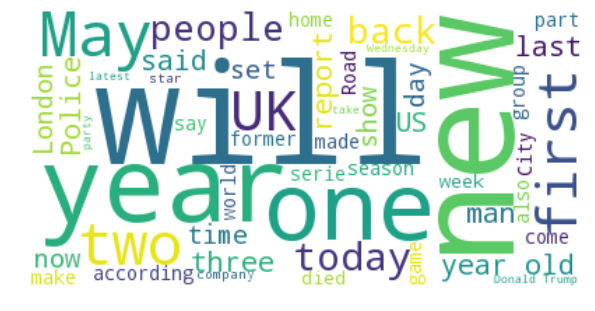

In [35]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

### 8.2.5. 특징값 추출

#### Scikit learn에서 제공하는 TfidfVectorizer 모듈을 사용해 텍스트 데이터의 TF-IDF 값으로 문서 단어 행렬을 구성

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

- 텍스트 데이터를 astype 함수를 사용해 문자열로, tolist 함수를 사용해 리스트로 변환 후 text_data_list 변수에 저장
- Numpy의 array 함수와 for문을 사용해 배열로 변환 후 text_data_arr에 저장

In [38]:
text_data_list = df['description'].astype(str).tolist()
text_data_arr = np.array([''.join(text) for text in text_data_list])

- TfidfVectorizer 함수를 사용해 tf-idf 문서 단어 행렬을 만드는 모듈 vectorizer 선언
- Min_df=2 : 단어 최소 등장 빈도로 2번 이상 등장하는 단어들을 대상으로 함
- Ngram_range : 단어 추출 단위로 (1,2)는 unigram과 bigram 추출, 1<= n <= 2
- Strip_accents=‘Unicode’ : accents(억양표시)를 제거하며 unicode에 해당하는 모든 문자에 적용 가능
- Norm=‘l2’ : pearson 함수를 사용해 normalization 진행
- 문서단어행렬을 만드는 모듈 vectorizer의 Fit_transform 함수를 사용해 배열에 저장된 데이터의  문서단어행렬을 구하고 matrix 형식 변수 text_data에 저장

In [39]:
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2), strip_accents='unicode', norm='l2')
text_data = vectorizer.fit_transform(text_data_arr)

- 문서 단어 행렬을 입력한 데이터 프레임 df_tfidf
- 행 : 문서 번호
- 열 : token

In [40]:
df_tfidf = pd.DataFrame(text_data.A, columns=vectorizer.get_feature_names())
df_tfidf

,000,000 computers,000 fans,000 loan,000 of,000 to,000 was,000 women,05,10,...,young people,youngest,youngsters,your,your vote,youtube,youtube and,yvonne,yvonne fletcher,zoe
0,0.139847,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
5,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
6,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
7,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
8,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
9,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


### 8.2.6. 뉴스 분류

#### 성능 측정 패키지 import
- Confusion matrix : 분류 결과 건수를 나타내는 confusion matrix를 구성하는 모듈
- Classification report : recall, precision, f-measure를 제공하는 모듈
- f1_score : f-measure를 계산
- Accuracy score : 정확도 수치 계산

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#### 데이터셋 준비
- 뉴스 내용 (description)과 카테고리 (category)를 각각 리스트형 변수 description, category로 변환

In [42]:
description = df['description'].astype(str).tolist()
category = df['category'].astype(str).tolist()

#### 데이터 셋 분할
- 데이터 셋의 80%는 training set으로, 나머지 20%는 test set으로 구성
- 기계학습 알고리즘에 적용하기 위해서 np.array 함수를 사용해 배열로 변형
- 뉴스 내용 description의 training set 범위 내 내용 data를 join 함수를 사용해 연결하고 x_train에 저장
- 뉴스 카테고리 category 데이터를 y_train에 저장

In [43]:
trainset_size = int(round(len(description)*0.80))

x_train = np.array([''.join(data) for data in description[0:trainset_size]])
y_train = np.array([data for data in category[0:trainset_size]])

x_test = np.array([''.join(data) for data in description[trainset_size+1:len(description)]])
y_test = np.array([data for data in category[trainset_size+1:len(category)]])

- Fit transform 함수를 사용해 training set을 기반으로 문서단어행렬 구성
- Transform 함수를 사용해 앞 행렬을 구성한 단어들을 기반으로 문서단어행렬 구성

In [44]:
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

- 각 분류 모델의 성능을 기록할 데이터 프레임 df_per 선언

In [68]:
df_per = pd.DataFrame(columns=['Classifier', 'F-Measure', 'Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


##### Naive Bayes

- MultinomialNB 패키지 import
- MultinomialNB 모듈을 사용해 naïve bayes 알고리즘으로 모델을 생성
- Fit 함수를 사용해 모델 nb_classifier 훈련
- Predict 함수를 사용해 test set에 대한 분류, 예측 값을 구한 후 변수 nb_pred에 저장

In [69]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB().fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

- 실제 값 y_test와 예측값 nb_pred를 비교해 confusion matrix, classification report 출력

In [70]:
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pred))
print('\n Classification Report \n')
print(classification_report(y_test, nb_pred))


 Confusion Matrix 

[[10  0  1  3  5  0  1  0]
 [ 1 10  0  1  5  1  1  2]
 [ 1  1  9  3  3  0  3  0]
 [ 1  0  1  8  1  0  2  0]
 [ 3  0  0  0 12  0  1  0]
 [ 1  0  0  2  1 23  2  0]
 [ 2  0  0  1  3  0 10  0]
 [ 1  1  0  4  5  0  5  4]]

 Classification Report 

                      precision    recall  f1-score   support

            Business       0.50      0.50      0.50        20
       Entertainment       0.83      0.48      0.61        21
              Health       0.82      0.45      0.58        20
            Politics       0.36      0.62      0.46        13
ScienceAndTechnology       0.34      0.75      0.47        16
              Sports       0.96      0.79      0.87        29
                  UK       0.40      0.62      0.49        16
               World       0.67      0.20      0.31        20

         avg / total       0.66      0.55      0.56       155



- f1_score 함수를 사용해 실제값과 분류 결과값을 비교해 f-measure 계산
- average=‘weighted’를 사용해 각 클래스마다 가중치 적용
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- accuracy_score 함수를 사용해 실제값과 분류 결과값을 비교해 f-measure 계산
- normalize=True를 통해 정확도 출력, False일 경우 올바르게 분류된 데이터 건수 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- loc 함수를 사용해 데이터 프레임에 인덱스를 지정해 입력

In [71]:
fm = round(f1_score(y_test, nb_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Naive Bayes', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.56,0.55


##### Decision Tree

- Decision Tree 패키지 import
- DecisionTreeClassifier 모듈을 사용해 decision tree 알고리즘으로 모델을 생성
- Fit 함수를 사용해 모델 dt_classifier 훈련
- Predict 함수를 사용해 test set에 대한 분류, 예측 값을 구한 후 변수 dt_pred에 저장

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

- 실제 값 y_test와 예측값 dt_pred를 비교해 confusion matrix, classification report 출력

In [73]:
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, dt_pred))
print('\n Classification Report \n')
print(classification_report(y_test, dt_pred))


 Confusion Matrix 

[[ 6  2  1  2  6  0  1  2]
 [ 0  5  2  2  4  1  1  6]
 [ 2  3  8  2  4  0  0  1]
 [ 1  1  1  5  0  3  1  1]
 [ 7  1  2  2  4  0  0  0]
 [ 1  2  1  2  1 19  0  3]
 [ 3  4  2  1  0  1  1  4]
 [ 1  2  3  4  3  0  0  7]]

 Classification Report 

                      precision    recall  f1-score   support

            Business       0.29      0.30      0.29        20
       Entertainment       0.25      0.24      0.24        21
              Health       0.40      0.40      0.40        20
            Politics       0.25      0.38      0.30        13
ScienceAndTechnology       0.18      0.25      0.21        16
              Sports       0.79      0.66      0.72        29
                  UK       0.25      0.06      0.10        16
               World       0.29      0.35      0.32        20

         avg / total       0.37      0.35      0.36       155



- f1_score 함수를 사용해 실제값과 분류 결과값을 비교해 f-measure 계산
- average=‘weighted’를 사용해 각 클래스마다 가중치 적용
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- accuracy_score 함수를 사용해 실제값과 분류 결과값을 비교해 f-measure 계산
- normalize=True를 통해 정확도 출력, False일 경우 올바르게 분류된 데이터 건수 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- loc 함수를 사용해 데이터 프레임에 인덱스를 지정해 입력

In [74]:
fm = round(f1_score(y_test, dt_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, dt_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Decison Tree', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.56,0.55
1,Decison Tree,0.36,0.35


##### Random Forest

- Random Forest 패키지 import
- RandomForestClassifier 모듈을 사용해 random forest 알고리즘으로 모델을 생성
- Fit 함수를 사용해 모델 rf_classifier 훈련
- Predict 함수를 사용해 test set에 대한 분류, 예측 값을 구한 후 변수 rf_pred에 저장

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

- 실제 값 y_test와 예측값 rf_pred를 비교해 confusion matrix, classification report 출력

In [76]:
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, rf_pred))
print('\n Classification Report \n')
print(classification_report(y_test, rf_pred))


 Confusion Matrix 

[[ 6  0  1  4  7  0  1  1]
 [ 3  7  2  2  3  1  1  2]
 [ 0  1 12  1  4  0  1  1]
 [ 0  1  1  8  1  0  2  0]
 [ 2  0  1  0 11  0  1  1]
 [ 0  3  0  1  2 22  0  1]
 [ 2  0  1  2  2  0  8  1]
 [ 1  2  1  4  5  0  1  6]]

 Classification Report 

                      precision    recall  f1-score   support

            Business       0.43      0.30      0.35        20
       Entertainment       0.50      0.33      0.40        21
              Health       0.63      0.60      0.62        20
            Politics       0.36      0.62      0.46        13
ScienceAndTechnology       0.31      0.69      0.43        16
              Sports       0.96      0.76      0.85        29
                  UK       0.53      0.50      0.52        16
               World       0.46      0.30      0.36        20

         avg / total       0.56      0.52      0.52       155



- f1_score 함수를 사용해 실제값과 분류 결과값을 비교해 f-measure 계산
- average=‘weighted’를 사용해 각 클래스마다 가중치 적용
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- accuracy_score 함수를 사용해 실제값과 분류 결과값을 비교해 f-measure 계산
- normalize=True를 통해 정확도 출력, False일 경우 올바르게 분류된 데이터 건수 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- loc 함수를 사용해 데이터 프레임에 인덱스를 지정해 입력

In [77]:
fm = round(f1_score(y_test, rf_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, rf_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Random Forest', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.56,0.55
1,Decison Tree,0.36,0.35
2,Random Forest,0.52,0.52


##### Support Vector Machine

- SVM 패키지 import
- LinearSVC 모듈을 사용해 SVM 알고리즘으로 모델을 생성Fit 함수를 사용해 모델 svm_classifier 훈련
- Predict 함수를 사용해 test set에 대한 분류, 예측 값을 구한 후 변수 svm_pred에 저장

In [78]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC().fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

- 실제 값 y_test와 예측값 svm_pred를 비교해 confusion matrix, classification report 출력

In [79]:
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, svm_pred))
print('\n Classification Report \n')
print(classification_report(y_test, svm_pred))


 Confusion Matrix 

[[10  1  1  3  3  0  1  1]
 [ 0 11  0  2  4  1  1  2]
 [ 1  1 10  3  4  0  1  0]
 [ 1  0  1  7  1  0  1  2]
 [ 3  3  1  1  7  0  1  0]
 [ 1  2  0  1  0 25  0  0]
 [ 2  1  1  1  1  0 10  0]
 [ 2  1  1  3  3  0  3  7]]

 Classification Report 

                      precision    recall  f1-score   support

            Business       0.50      0.50      0.50        20
       Entertainment       0.55      0.52      0.54        21
              Health       0.67      0.50      0.57        20
            Politics       0.33      0.54      0.41        13
ScienceAndTechnology       0.30      0.44      0.36        16
              Sports       0.96      0.86      0.91        29
                  UK       0.56      0.62      0.59        16
               World       0.58      0.35      0.44        20

         avg / total       0.60      0.56      0.57       155



- f1_score 함수를 사용해 실제값과 분류 결과값을 비교해 f-measure 계산
- average=‘weighted’를 사용해 각 클래스마다 가중치 적용
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- accuracy_score 함수를 사용해 실제값과 분류 결과값을 비교해 f-measure 계산
- normalize=True를 통해 정확도 출력, False일 경우 올바르게 분류된 데이터 건수 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- loc 함수를 사용해 데이터 프레임에 인덱스를 지정해 입력

In [80]:
fm = round(f1_score(y_test, svm_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, svm_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Support Vector Machine', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.56,0.55
1,Decison Tree,0.36,0.35
2,Random Forest,0.52,0.52
3,Support Vector Machine,0.57,0.56


##### 성능 비교
- 시각화를 위해 분류기 명을 set_index 함수를 사용해 index로 설정

In [81]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
Naive Bayes,0.56,0.55
Decison Tree,0.36,0.35
Random Forest,0.52,0.52
Support Vector Machine,0.57,0.56


- F-measure과 Accuracy 값을 plot 함수를 사용해 시각화
- ind=‘bar’ : 막대 그래프
- title=‘preformance’ : 그래프 제목
- figsize : 그래프 크기 지정
- legend : 데이터 설명
- fontsize : 글씨 크기 
- 그래프의 x축을 분류기 명으로 지정
- 그래프 그리기

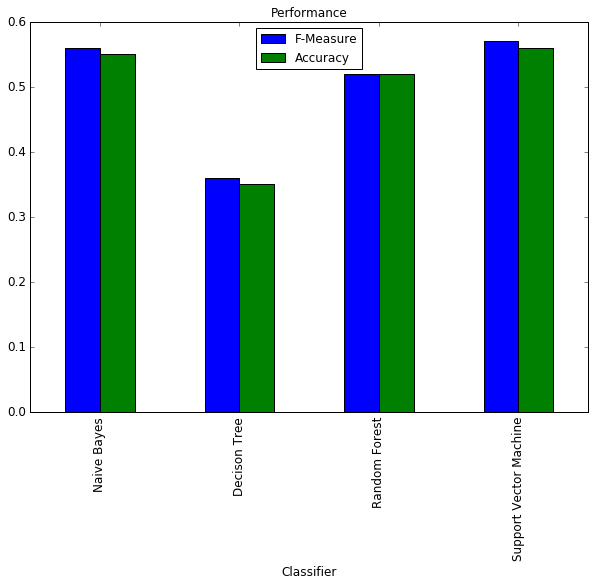

In [82]:
ax = df_per_1[['F-Measure','Accuracy']].plot(kind='bar', title ='Performance'
                                             , figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel('Classifier', fontsize=12)
plt.show()